<a href="https://colab.research.google.com/github/YuukiHnf/GaussianProcess/blob/main/Gpy_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gpy
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.0MB 5.5MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
  Created wheel for gpy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633952 sha256=8bcc5c28bd0f36604631ccbf37ef2a0554c4f4e274f32091ed99e2d8f5e81187
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102552 sha256=4f9f86a85cf5241e3b1f0d101adcd967f31dd3af8b030a5823fd49114d819d86
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built gpy paramz


In [ ]:
import GPy
plt.style.use('ggplot')

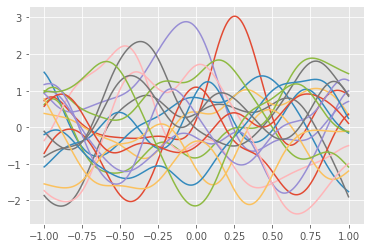

In [ ]:
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=0.2)

np.random.seed(seed=123)
N_sim = 1000
x_sim = np.linspace(-1,1,N_sim)
x_sim = x_sim[:, None]
mu = np.zeros(N_sim)
cov = kernel.K(x_sim, x_sim)

y_sim = np.random.multivariate_normal(mu, cov, size=20)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(20):
  ax.plot(x_sim[:], y_sim[i,:])

## 1 -> 1

In [ ]:
import pandas as pd

kernel = GPy.kern.RBF(1)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-GPbook-Fig2_05.txt')
model = GPy.models.GPRegression(d.X[:, None], d.Y[:,None], kernel=kernel)
print(model)


Name : GP regression
Objective : 29.744437404067714
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


 /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [ ]:
d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-GPbook-Fig2_05.txt')

d.X[:, None].shape

 /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


(20, 1)

In [ ]:
model.optimize()
print(model)


Name : GP regression
Objective : 17.91518030261218
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   2.7030280393860804  |      +ve      |        
  rbf.lengthscale          |   1.3155577710661983  |      +ve      |        
  Gaussian_noise.variance  |  0.03028434115299786  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x7fdd31f49518>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fdd31f49940>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fdd31f7b470>]]}

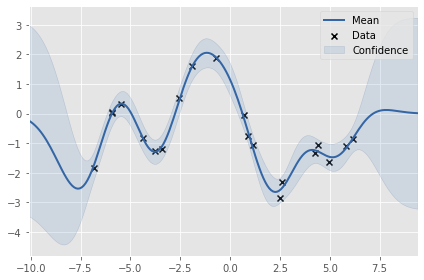

In [ ]:
model.plot()

In [ ]:
x_pred = np.linspace(-10,10,100)
x_pred = x_pred[:,None]
print(x_pred.size)

100


In [ ]:
y_pred = model.predict_quantiles(x_pred, quantiles=(2.5, 50, 97.5))

In [ ]:
y_pred_np = np.array(y_pred).reshape(3,-1)
print(y_pred_np.shape)


(3, 100)


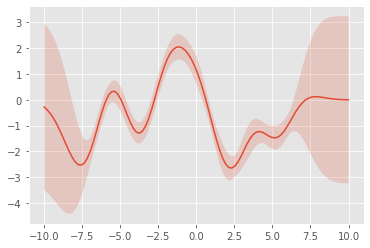

In [ ]:
plt.fill_between(x_pred[:,0], y_pred_np[0,:], y_pred_np[2,:],alpha=0.2)
plt.plot(x_pred, y_pred_np[1,:])

In [ ]:
kernel2 = GPy.kern.RBF(1) + GPy.kern.Poly(1) + GPy.kern.Linear(1)

model = GPy.models.GPRegression(d.X[:,None], d.Y[:, None], kernel=kernel2)
print(model)


Name : GP regression
Objective : 39.741396926136446
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  sum.rbf.variance         |    1.0  |      +ve      |        
  sum.rbf.lengthscale      |    1.0  |      +ve      |        
  sum.poly.variance        |    1.0  |      +ve      |        
  sum.poly.scale           |    1.0  |      +ve      |        
  sum.poly.bias            |    1.0  |      +ve      |        
  sum.linear.variances     |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


 /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [ ]:
model.optimize()
print(model)


Name : GP regression
Objective : 17.85126302856324
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  sum.rbf.variance         |    2.4969542981154733  |      +ve      |        
  sum.rbf.lengthscale      |     1.310505555603046  |      +ve      |        
  sum.poly.variance        |    0.2214370176758155  |      +ve      |        
  sum.poly.scale           |  0.030715897551171167  |      +ve      |        
  sum.poly.bias            |   0.28561603954633763  |      +ve      |        
  sum.linear.variances     |   1.7001736952129e-09  |      +ve      |        
  Gaussian_noise.variance  |   0.03022008708009674  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x7fdd317cf3c8>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fdd317cf860>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fdd31b02ac8>]]}

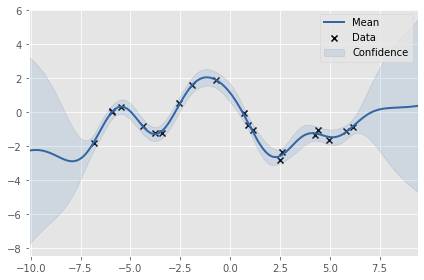

In [ ]:
model.plot()

In [ ]:
kernel = GPy.kern.Matern52(2, ARD=True)

np.random.seed(seed=123)
N = 50
X = np.random.uniform(-3.,3.,(N, 2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2]) + np.random.randn(N,1)*0.05
print(X.shape, Y.shape)

(50, 2) (50, 1)


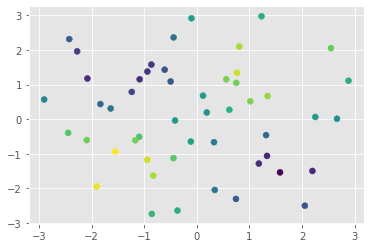

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0])

 /usr/local/lib/python3.6/dist-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x7fdd31ad0be0>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7fdd31ad0470>]}

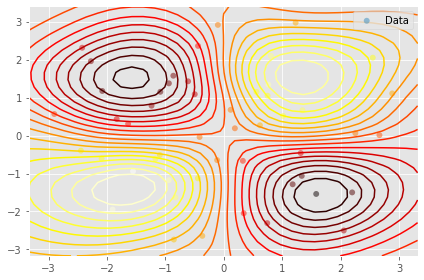

In [ ]:
model = GPy.models.GPRegression(X,Y,kernel)
model.optimize(messages=True, max_iters=1e5)
model.plot()

In [ ]:
x_pred = np.array([np.linspace(-3, 3, 100), np.linspace(3, -3, 100)]).T
y_qua_pred = model.predict_quantiles(x_pred, quantiles=(2.5, 50, 97.5))

In [ ]:
y_pred = np.array(y_qua_pred)

In [ ]:
kernel = GPy.kern.RBF(1)
dx_numpy = np.array(d.X[:, None])
dy_numpy = np.array(d.Y[:, None])
m_full = GPy.models.GPRegression(dx_numpy, dy_numpy, kernel=kernel)
m_full.optimize()

 /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
 /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [ ]:
Z = np.hstack((np.linspace(-6, -3, 3), np.linspace(3, 6, 3))).reshape(-1,1)
print(Z.shape)

(6, 1)


{'dataplot': [<matplotlib.collections.PathCollection at 0x7fdd341fcba8>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fdd31be3320>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fdd341fc588>]],
 'inducing': <matplotlib.collections.PathCollection at 0x7fdd341fc2b0>}

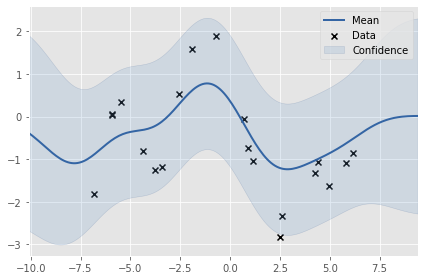

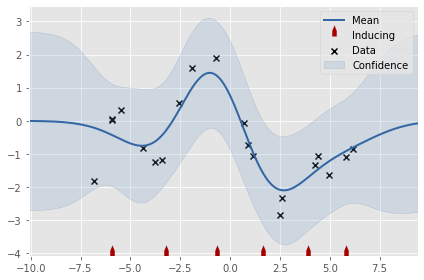

In [ ]:
m_sparse = GPy.models.SparseGPRegression(dx_numpy, dy_numpy, kernel=kernel,Z=Z)
m_sparse.optimize()
m_full.plot()
m_sparse.plot()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(dx_numpy)

In [ ]:
kmeans.labels_

array([3, 3, 3, 3, 0, 0, 0, 5, 5, 5, 2, 2, 2, 4, 4, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 2.54695   ],
       [-5.77046767],
       [ 4.54680467],
       [-2.216142  ],
       [ 0.9050915 ],
       [-4.387844  ],
       [ 5.9893875 ],
       [-6.836951  ],
       [-0.683068  ],
       [-3.573649  ]])

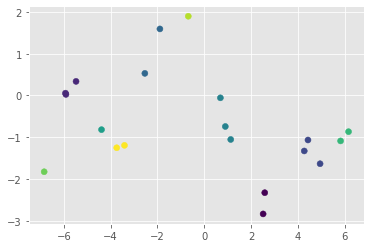

In [ ]:
plt.scatter(dx_numpy, dy_numpy, c=kmeans.labels_)

In [ ]:
m_sparse_kmean = GPy.models.SparseGPRegression(dx_numpy, dy_numpy, kernel=kernel, Z=kmeans.cluster_centers_)
m_sparse_kmean.optimize()

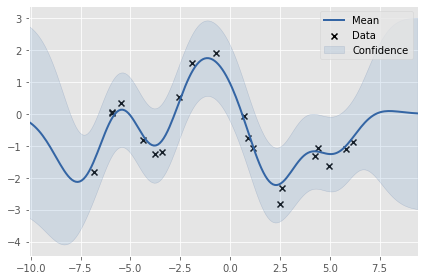

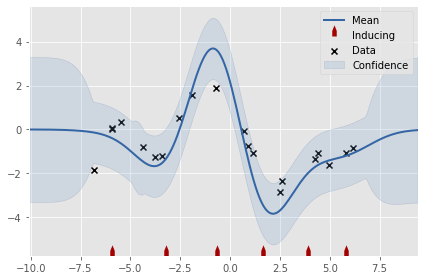

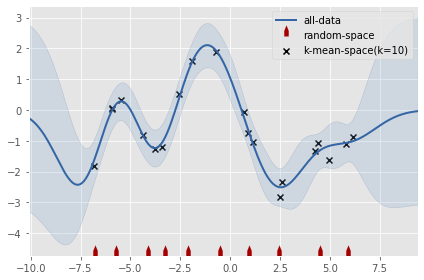

In [ ]:
m_full.plot()
m_sparse.plot()
m_sparse_kmean.plot()
plt.legend(['all-data', 'random-space', 'k-mean-space(k=10)'])

In [ ]:
kernel = GPy.kern.RBF(2, ARD=True)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-classification.txt')

print(d)

           X1        X2  Y
0    1.208985  0.421448  0
1    0.504542 -0.285730  1
2    0.630568  1.054712  0
3    1.056364  0.601873  0
4    1.095326 -1.447579  1
..        ...       ... ..
195  0.601936 -0.503923  0
196 -0.490114 -0.841122  1
197  1.847075  2.362322  0
198 -0.279703  0.753196  1
199  1.953357 -0.746632  0

[200 rows x 3 columns]


In [ ]:
d.Y[:,None].shape

 /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


(200, 1)

In [ ]:
model = GPy.models.GPClassification(d[['X1', 'X2']].values, d.Y[:,None])
model.optimize()

 /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


 /usr/local/lib/python3.6/dist-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


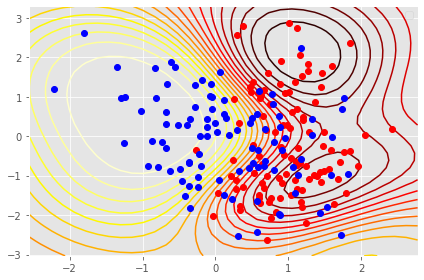

In [ ]:
model.plot(plot_data=False)['gpmean'][0]
d0 = d[d.Y == 0]
d1 = d[d.Y == 1]
plt.plot(d0.X1, d0.X2, 'ro')
plt.plot(d1.X1, d1.X2, 'bo')

In [ ]:
outer_data = pd.read_csv('http://chasen.org/~daiti-m/gpbook/data/gpr-cauchy.dat',sep='	',header=None)
print(outer_data.shape)

(40, 3)


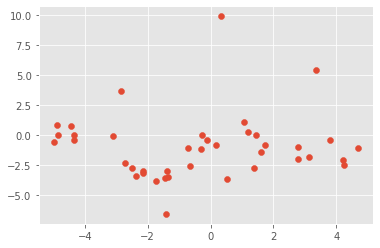

In [ ]:
plt.scatter(outer_data[0], outer_data[1])

In [ ]:
data_x = np.array(outer_data[0]).reshape(-1,1)
data_y = np.array(outer_data[1]).reshape(-1,1)

In [ ]:
print(data_x.reshape(-1,1).ndim)

2


{'dataplot': [<matplotlib.collections.PathCollection at 0x7fdd289985f8>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fdd28998a90>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fdd289985c0>]]}

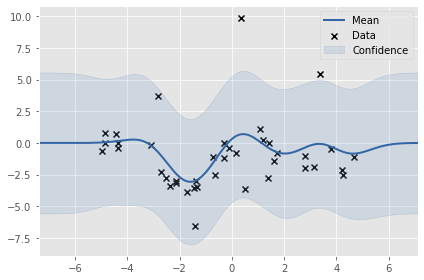

In [ ]:
kernel = GPy.kern.RBF(1, ARD=True) 
model = GPy.models.GPRegression(data_x, data_y, kernel=kernel)
model.optimize()
model.plot()

 /usr/local/lib/python3.6/dist-packages/GPy/inference/latent_function_inference/laplace.py:225: UserWarning:Not perfect mode found (f_hat). difference: 0.00035907355980668854, iteration: 30 out of max 30
 /usr/local/lib/python3.6/dist-packages/GPy/inference/latent_function_inference/laplace.py:229: UserWarning:f_hat now fine again. difference: 4.6759672272855823e-05, iteration: 4 out of max 30


{'dataplot': [<matplotlib.collections.PathCollection at 0x7fdd28926e48>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fdd288eccf8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fdd2a606940>]]}

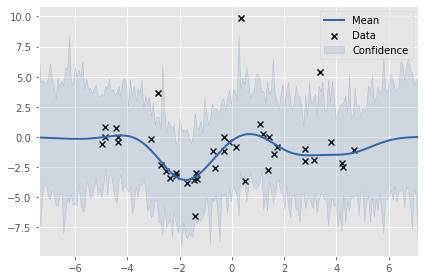

In [ ]:
model = GPy.core.GP(data_x, data_y, kernel=kernel, inference_method=GPy.inference.latent_function_inference.Laplace(),
                    likelihood=GPy.likelihoods.StudentT())
model.optimize()
model.plot()